# Loading the Data


In [2]:
!pip install gdown

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/spotify_songs_cleaned_V1 (1).csv')

# Data Exploration

In [9]:
df.shape


(32833, 23)

In [10]:
print(df.columns)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_year',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key_name', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [13]:
pd.DataFrame(df.columns, columns=['Column Names'] )

,Column Names
0,track_id
1,track_name
2,track_artist
3,track_popularity
4,track_album_id
5,track_album_name
6,track_album_release_year
7,playlist_name
8,playlist_id
9,playlist_genre


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_year  32833 non-null  int64  
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  object 
 12  energy                    32833 non-null  object 
 13  key_name                  32833 non-null  object 
 14  loudne

In [23]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_year,playlist_name,playlist_id,playlist_genre,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,F#,-2.634,Major,5.83%,10.20%,0.00%,6.53%,51.80%,122,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,B,-4.969,Major,3.73%,7.24%,0.42%,35.70%,69.30%,100,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,C#,-3.432,minor,7.42%,7.94%,0.00%,11.00%,61.30%,124,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,G,-3.778,Major,10.20%,2.87%,0.00%,20.40%,27.70%,122,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,C#,-4.672,Major,3.59%,8.03%,0.00%,8.33%,72.50%,124,189052


# Data Cleaning


In [29]:
for feature in ["valence", "duration_ms", "loudness", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]:
    # Convert column to string, then remove '%' and replace commas with dots
    df[feature] = df[feature].astype(str).str.replace('%', '').str.replace(',', '.')

    # Convert to float
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_year  32833 non-null  int64  
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key_name                  32833 non-null  object 
 14  loudne

In [33]:
duplicates = df.duplicated()
duplicates.sum()

0

In [34]:
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_year,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [35]:
df.dropna(inplace=True)

In [37]:
df.shape

(32828, 23)

In [14]:
summary_stats = df.describe()
print(summary_stats)

       track_popularity  track_album_release_year      loudness         tempo  \
count      32833.000000              32833.000000  32833.000000  32833.000000   
mean          42.477081               2011.137270     -6.719499    120.880882   
std           24.984074                 11.417451      2.988436     26.903324   
min            0.000000               1957.000000    -46.448000      0.000000   
25%           24.000000               2008.000000     -8.171000    100.000000   
50%           45.000000               2016.000000     -6.166000    122.000000   
75%           62.000000               2019.000000     -4.645000    134.000000   
max          100.000000               2020.000000      1.275000    239.000000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000  


In [15]:
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

                      track_id track_name   track_artist  \
count                    32833      32828          32828   
unique                   28356      23446          10692   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix   
freq                        10         22            161   

                track_album_id track_album_name    playlist_name  \
count                    32833            32828            32833   
unique                   22545            19739              449   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits  Indie Poptimism   
freq                        42              139              308   

                   playlist_id playlist_genre          playlist_subgenre  \
count                    32833          32833                      32833   
unique                     471              6                         24   
top     4JkkvMpVl4lSioqQjeAL0q            edm  progressive electro house   
freq                       247           6043         

# Data Visualization


# Genres

In [44]:
fig = px.bar(df, x="playlist_genre", title="Genres Count",
             category_orders={"playlist_genre": sorted_genres},
             color="playlist_genre",  # Color by genre
             color_continuous_scale="Viridis",  # Predefined color scale
             color_continuous_midpoint=0)  # Adjust midpoint if needed for darker shades

fig.update_traces(marker=dict(line=dict(width=0)))  # Optional: remove border to make bars appear smoother
fig.show()



In [21]:
avg_popularity_by_genre = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
print(avg_popularity_by_genre)

playlist_genre
pop      47.744870
latin    47.026576
rap      43.215454
rock     41.728338
r&b      41.223532
edm      34.833526
Name: track_popularity, dtype: float64


# Artists

In [45]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_popularity,track_album_id,track_album_name,track_album_release_year,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_artist,,,,,,,,,,,,,,,,,,,,,
Martin Garrix,161,161,161,161,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161
Queen,136,136,136,136,136,136,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
The Chainsmokers,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
David Guetta,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
Don Omar,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
Drake,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
Dimitri Vegas & Like Mike,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
Calvin Harris,91,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
Hardwell,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84


# Release Year


In [46]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_name", ascending=False)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2019,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081,...,9081,9081,9081,9081,9081,9081,9081,9081,9081,9081
2018,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,...,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312
2017,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428,...,2428,2428,2428,2428,2428,2428,2428,2428,2428,2428
2016,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,...,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127
2015,1779,1779,1779,1779,1779,1779,1779,1779,1779,1779,...,1779,1779,1779,1779,1779,1779,1779,1779,1779,1779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
1957,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1962,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


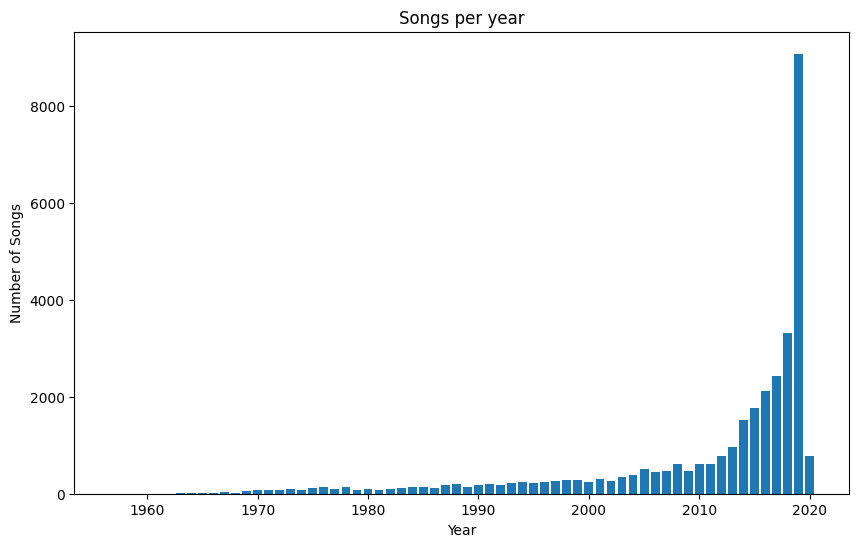

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


In [48]:
# earliest release year
df["track_album_release_year"].min()

1957

In [49]:
#latest release year
df["track_album_release_year"].max()

2020

# Popularity

In [53]:
popularity_stats = df['track_popularity'].describe()
print(popularity_stats)

count    32828.000000
mean        42.483551
std         24.980476
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64


In [54]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  39.432538107268456
Median Track Popularity:  42.0
Max Track Popularity:  98.0
Min Track Popularity:  0.0


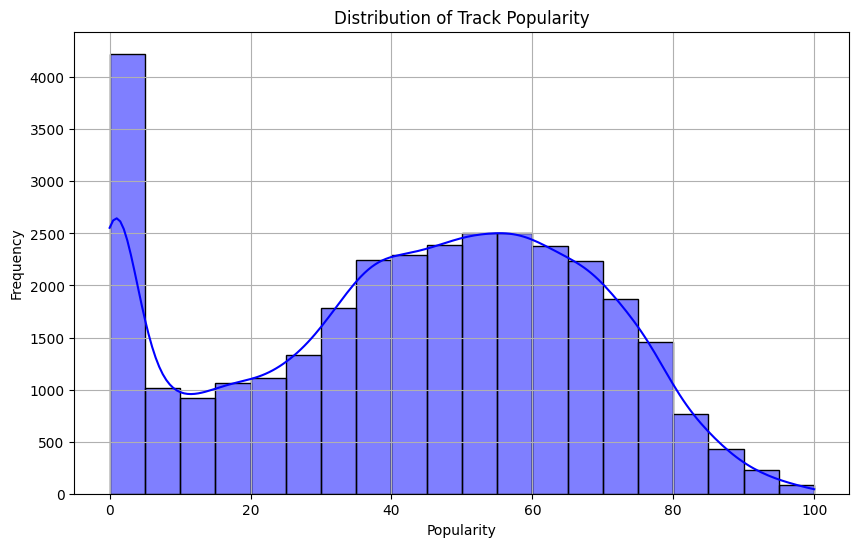

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True, color='blue')  # kde adds a smooth curve
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [51]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

,track_popularity
track_name,
The Box,98.000000
Tusa,98.000000
Don't Start Now,97.000000
everything i wanted,97.000000
RITMO (Bad Boys For Life),96.000000
Yummy,95.000000
bad guy,95.000000
Blinding Lights,94.333333
Someone You Loved,94.000000
